### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Cleaned_Austin_House_Price.csv')

In [4]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.columns

Index([u'Unnamed: 0', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'basement', u'yr_built', u'renovated', u'zipcode',
       u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Distribution Plot of the House Prices

c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


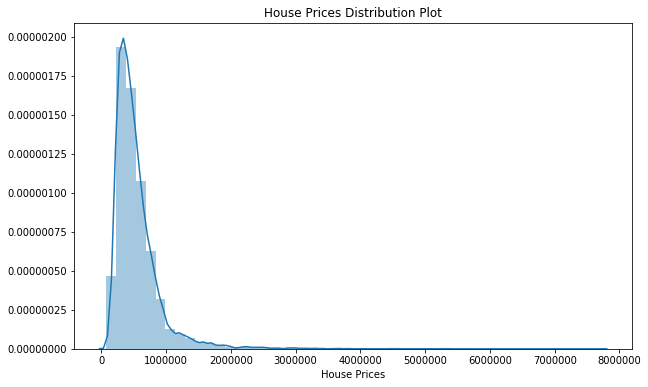

In [46]:
plt.figure(figsize = (10,6))
sns.distplot(df.price)
_ = plt.xlabel('House Prices')
_ = plt.title('House Prices Distribution Plot')

**Price feature is normally distributed but skewed right. To get a proper normal distribution we will get log values of the prices**

### Distribution Plot of the House Prices (Log)

c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


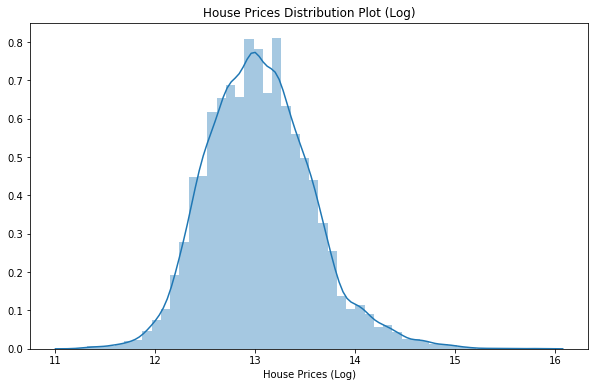

In [47]:
plt.figure(figsize = (10,6))
sns.distplot(np.log(df.price))
_ = plt.xlabel('House Prices (Log)')
_ = plt.title('House Prices Distribution Plot (Log)')

### Distribution of the Sqft of the Houses (Living Area & Lot Area and Above Area)

c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


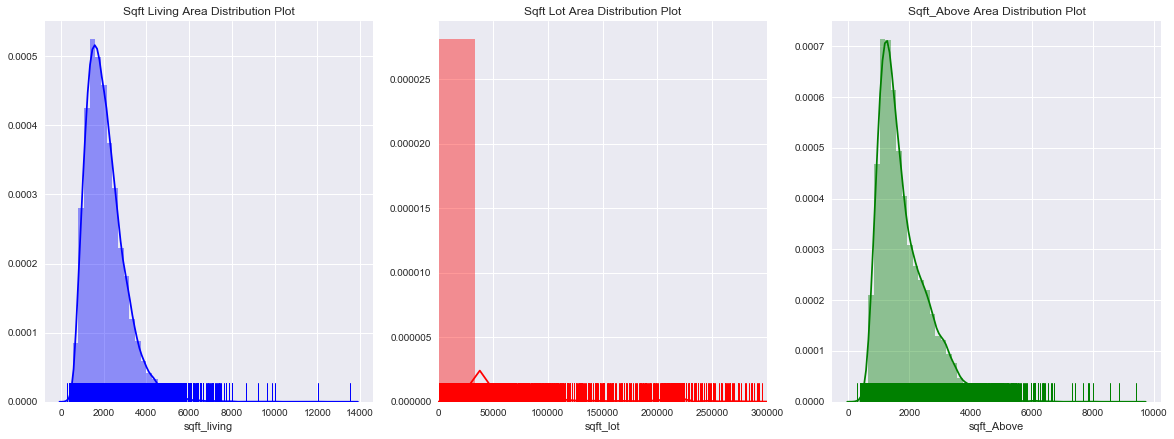

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.distplot(df.sqft_living, rug='True', color = 'blue', norm_hist = True, ax =ax1)
_ = ax1.set_xlabel('sqft_living')
_ = ax1.set_title ('Sqft Living Area Distribution Plot')

_ = sns.distplot(df.sqft_lot, rug='True', color = 'red', norm_hist = True, ax =ax2)
_ = ax2.set_xlabel('sqft_lot')
_ = ax2.set_title ('Sqft Lot Area Distribution Plot')
_ = ax2.set_xlim(0,300000, auto=True)

_ = sns.distplot(df.sqft_above, rug='True', color = 'green', norm_hist = True, ax =ax3)
_ = ax3.set_xlabel('sqft_Above')
_ = ax3.set_title ('Sqft_Above Area Distribution Plot')

plt.show()

**Sqft_living and Sqft_Above Feautes are normally distributed.**

### Bar Plot of the Bedrooms, categorized by renovation.

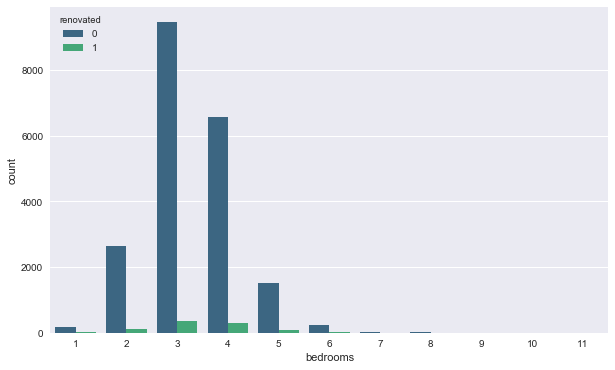

In [86]:
_ = plt.figure(figsize=(10,6))
sns.set()
_ = sns.countplot(x ='bedrooms', data = df, hue = 'renovated', palette = 'viridis')

**As seen above the most common bedrooms amount of each house are 3 and 4 ones.Renovated house numbers are extremely low.** 

### Bar Plot of the Bathrooms, categorized by renovation.

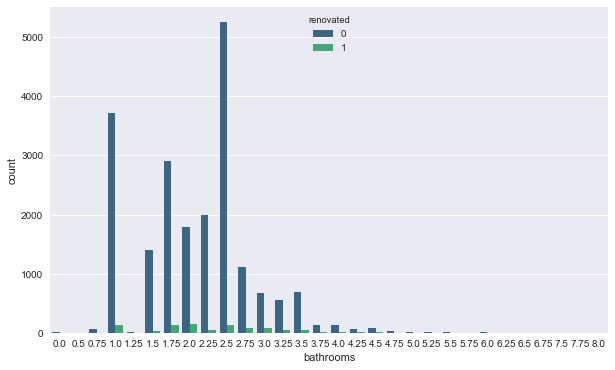

In [103]:
_ = plt.figure(figsize=(10,6))
sns.set()
_ = sns.countplot(x ='bathrooms', data = df, hue = 'renovated',palette = 'viridis')

**The most common bathroom's amounts are 2.5 and 1. 2.5 means two complete bathroom and 1 restroom.**

### Bar plot of the floors.

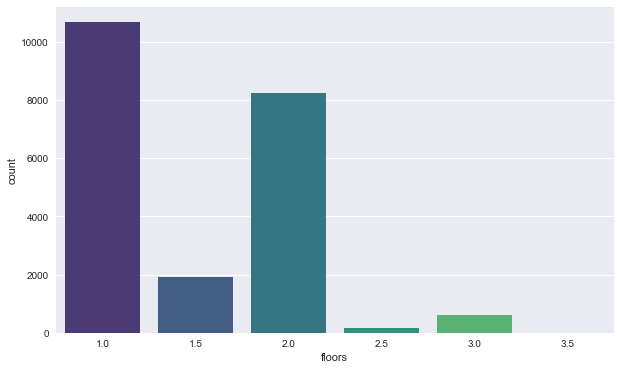

In [88]:
_ = plt.figure(figsize=(10,6))
sns.set()
_ = sns.countplot(x ='floors', data = df, palette = 'viridis')

**Mostly the houses have only one floor.**

### Scatter Plot of Bedrooms & House Prices

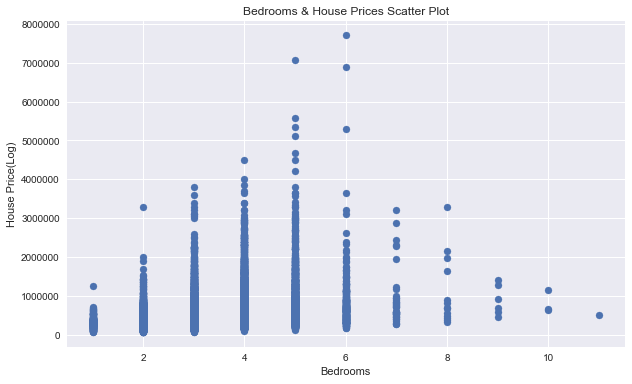

In [105]:
_ = plt.figure(figsize=(10,6))
_ = plt.scatter(y = df.price, x = 'bedrooms', data = df)
_ = plt.xlabel('Bedrooms')
_ = plt.ylabel('House Prices')
_ = plt.title('Bedrooms & House Prices Scatter Plot')


**The most expensive houses have 4, 5 or 6 bedrooms.**

### Living Area & House Prices Scatter Plot

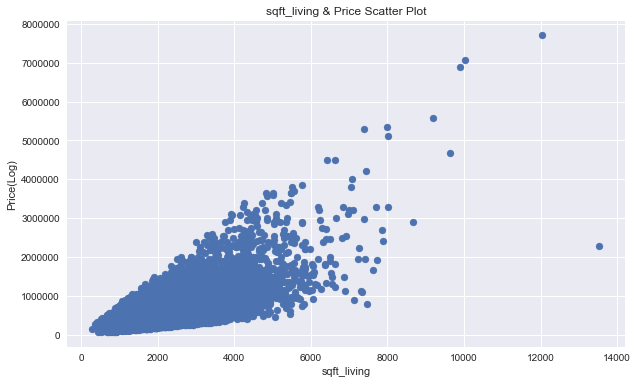

In [107]:
_ = plt.figure(figsize=(10,6))
_ = plt.scatter(y = df.price, x = 'sqft_living', data = df)
_ = plt.xlabel('sqft_living')
_ = plt.ylabel('Price(Log)')
_ = plt.title('sqft_living & Price Scatter Plot')

**There is a positive linear relationship between living are and the House Price.**

### Pairplot of the numerical Features

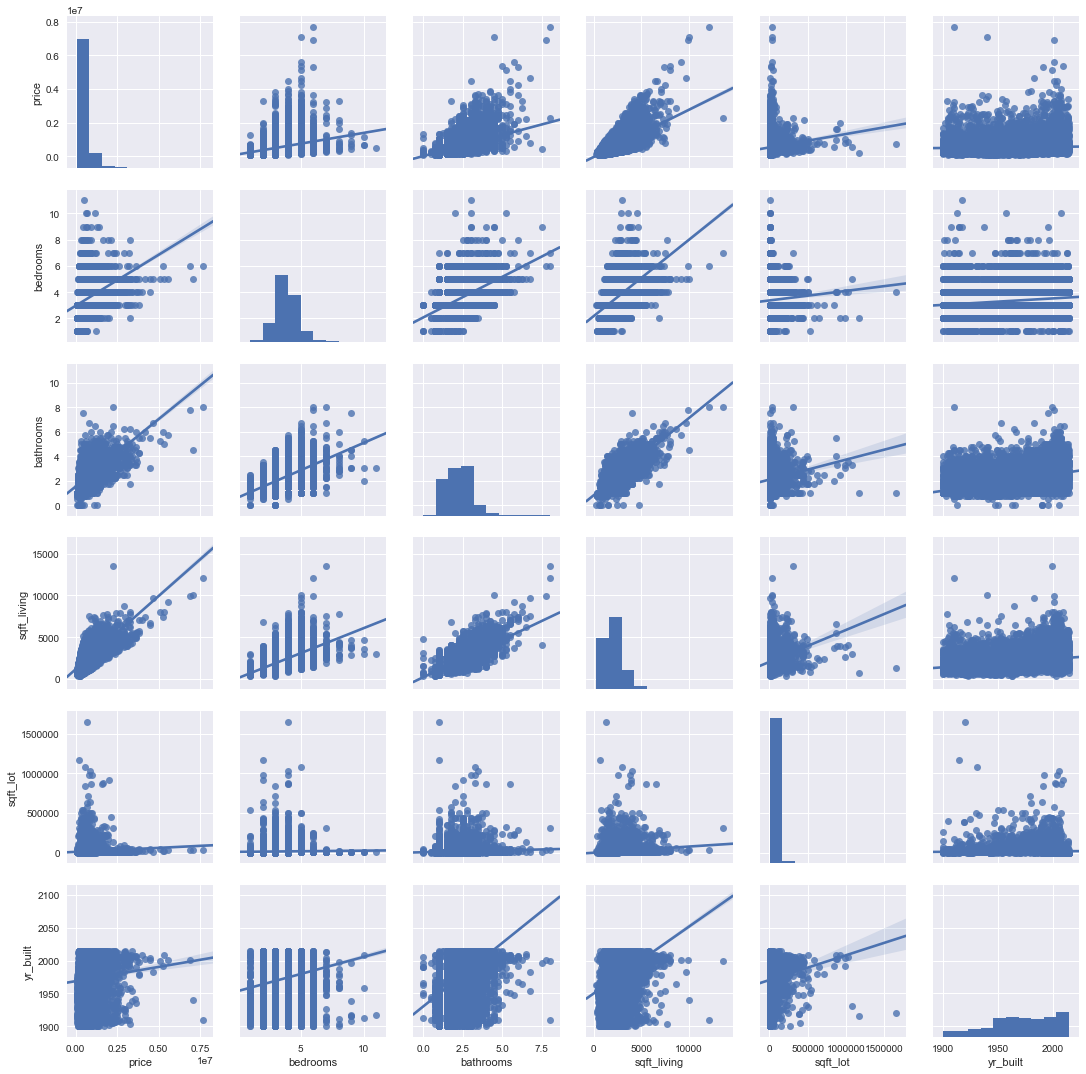

In [108]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'yr_built']], palette = 'viridis', kind='reg')

Positive Linear Correlation Between:
- Bedrooms & Living Area
- Bathrooms & Living Area
- Price & Living Area
- Price & Bedrooms
- Price & Bathrooms
- Price & Lot Area
- Price & Built Year

### Correlation Heatmap of the Some Features

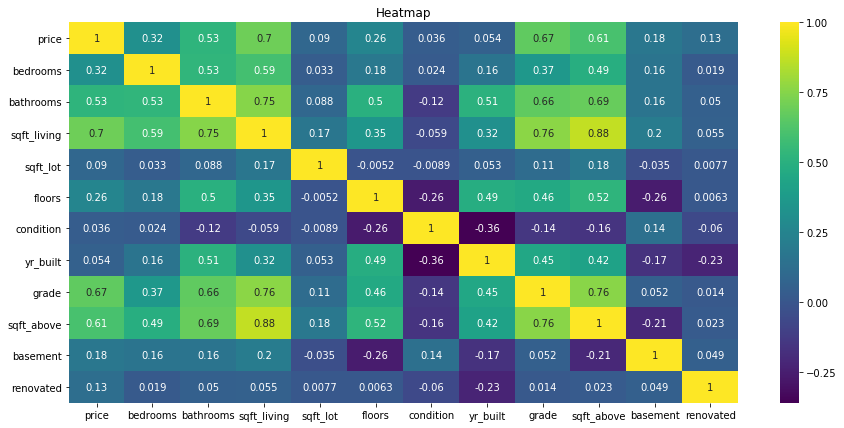

In [55]:
plt.figure(figsize= (15,7))
sns.heatmap(df[['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors','condition','yr_built','grade',
       'sqft_above', 'basement','renovated']].corr(), cmap="viridis", annot=True)
_ = plt.title('Heatmap')

**According to the Correlation Heatmap, the most important determinative feature for the price is living area of the house with 0.7. After Living Area, grade, sqft-above, built year, condition, bathrooms, bedrooms and floors are amongst the most important ones.**

### Line Plot of the Price Based on the Built Years

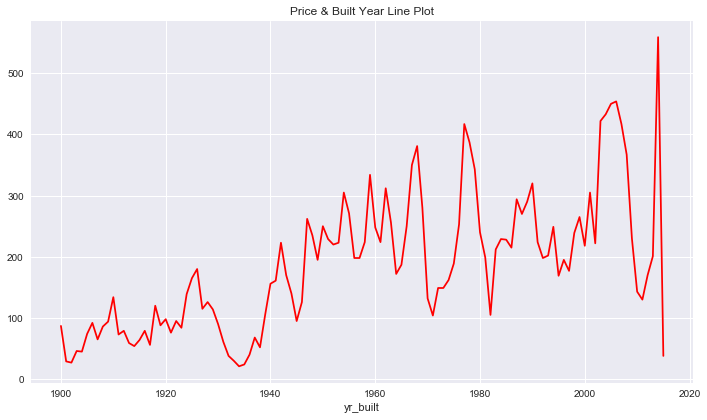

In [140]:
_ = plt.figure(figsize=(10,6))
df.groupby('yr_built').count()['price'].plot(style= 'red')
plt.title('Price & Built Year Line Plot')
plt.tight_layout()


**There is a tendency that newest houses are more expensive than the older ones.**

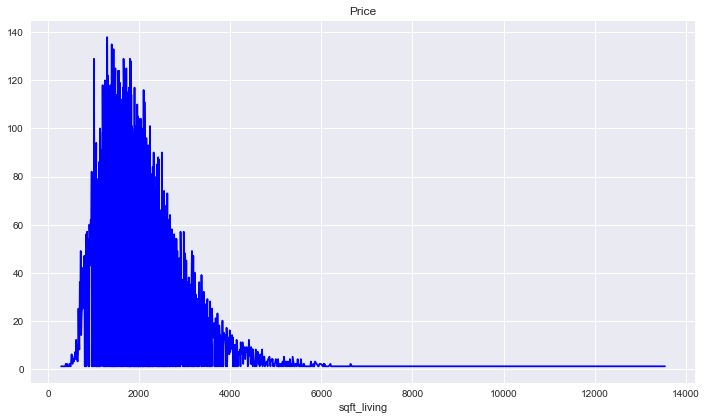

In [152]:
_ = plt.figure(figsize=(10,6))
df.groupby('sqft_living').count()['price'].plot(style = 'blue')
plt.title('Price')
plt.tight_layout()

**The houses which have living areas between 1750-2500 sqft are more expensive than the other ones.** 

### Box Plot and Swarm Plot of Bedrooms vs. Price

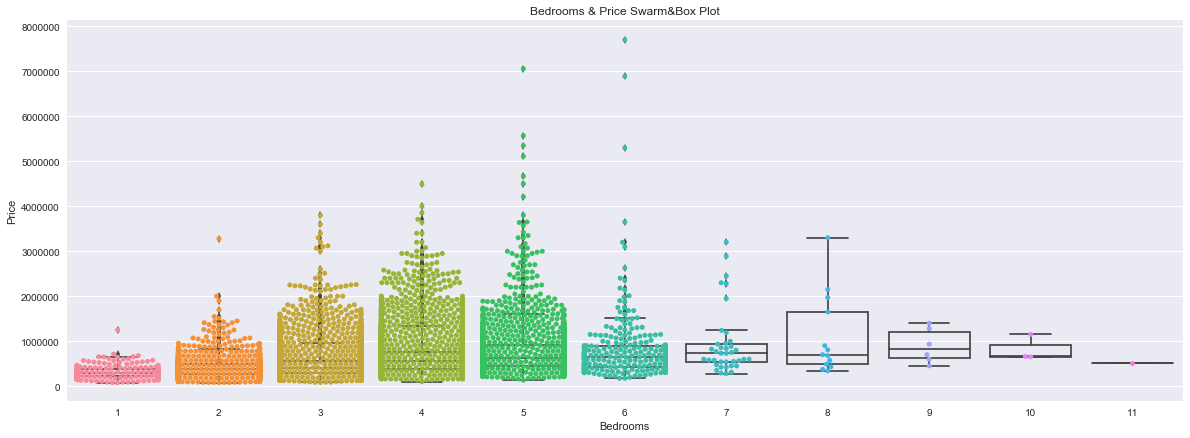

In [89]:
plt.figure(figsize = (20, 7))
_ = sns.swarmplot(x= 'bedrooms', y = 'price', data = df)
_ = sns.boxplot(x= 'bedrooms', y = 'price', data=df, boxprops={'facecolor':'None'})
_ = plt.xlabel('Bedrooms')
_ = plt.ylabel('Price')
_ = plt.title ('Bedrooms & Price Swarm&Box Plot')

**Houses are gathered mostly between 3 to 5 bedrooms.And Median price of these houses are too close to each others. **

### Box Plot of the Price

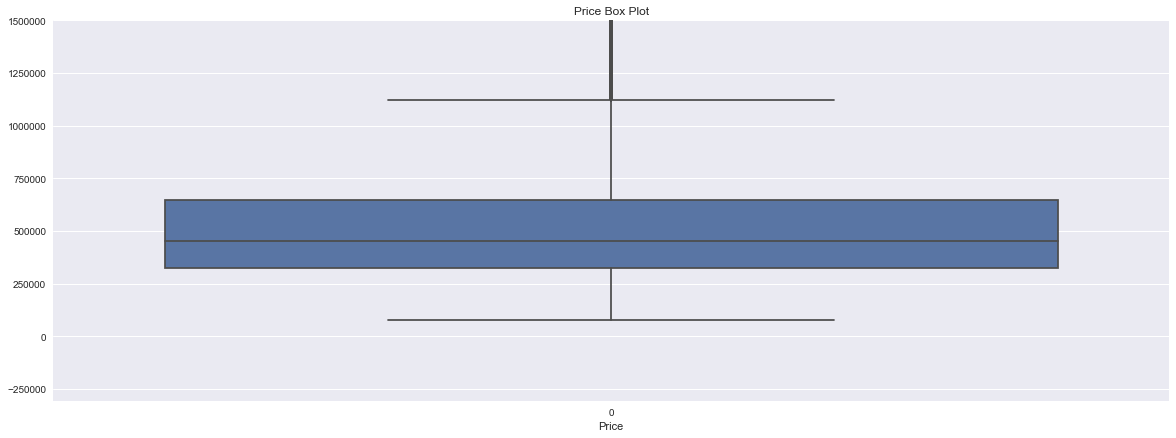

In [153]:
plt.figure(figsize = (20, 7))
_ = sns.boxplot(data = df.price)
_ = plt.xlabel('Price')
_ = plt.title ('Price Box Plot')
_ = plt.ylim(ymax = 1500000)

**Median Price is around 450000 and there are some outliers. Mostly the house prices gathered between 300000 and 600000 in Austin**

### Violin Plot of the Bedrooms

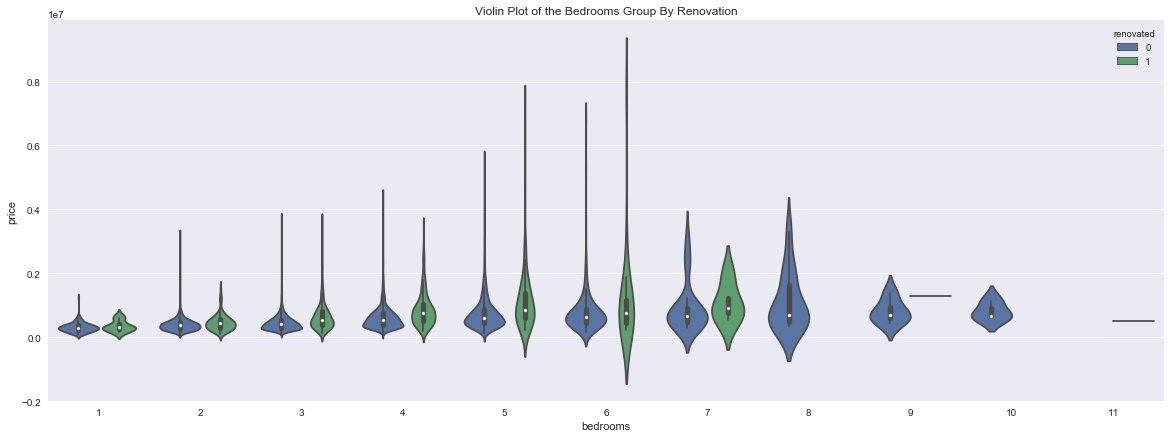

In [163]:
plt.figure(figsize = (20, 7))
_ = sns.violinplot(x='bedrooms', y='price', data=df, hue='renovated')
_ = plt.title('Violin Plot of the Bedrooms Group By Renovation')

**The most expensive houses have 5 and 6 bedrooms**

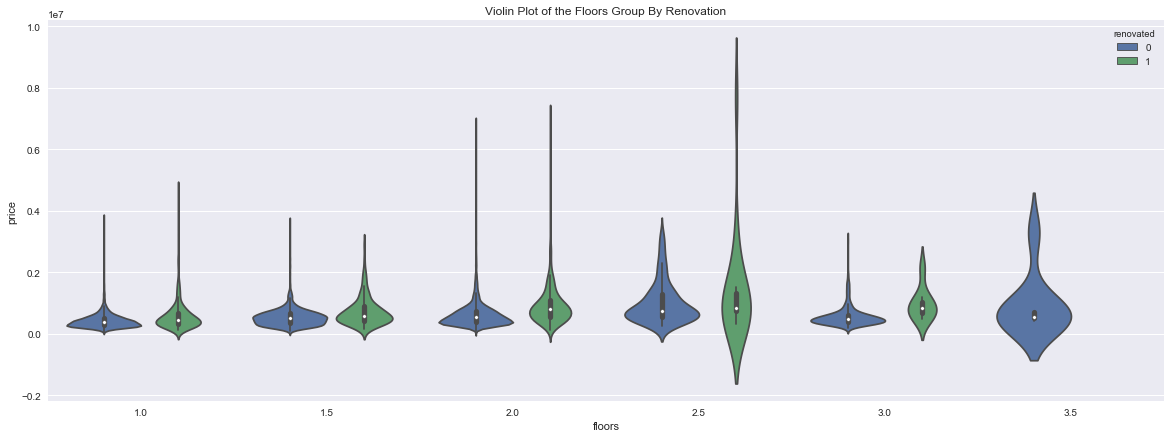

In [164]:
plt.figure(figsize = (20, 7))
_ = sns.violinplot(x='floors', y='price', data=df, hue='renovated')
_ = plt.title('Violin Plot of the Floors Group By Renovation')

**The most expensive houses have 2 and more floors.**